# 1 Dependencies import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scripts.quickml.reader import read_csv
from scripts.quickml.plot import dataframe_distribution_overview, feature_filling, feature_distribution_univar, feature_trend_bivar, feature_distribution_bivar
from scripts.quickml.compare import index_lth
from scripts.utils import fill_infos

# pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", None)

np.random.seed(294697)

***
# 2 Data import

For performance reasons, i choose to write a function that allow me to "chunk" the dataset and only take a percentage. I use a method for taking randomly the rows in each chunk, the result is that the output dataset have the same shape than if it was the original one.

In [2]:
original_dataset = read_csv(pd, np, "./datas/en.openfoodfacts.org.products.csv", 5, delimiter="\t", chunk_size=10000, nrows=10000)

/opt/anaconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (0,13,27,28,29,31,52) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [3]:
rows_nb, cols_nb = original_dataset.shape
original_dataset.shape

(500, 186)

In [4]:
original_dataset.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
6977,11110111333,http://world-en.openfoodfacts.org/product/0011...,org-database-usda,1587637365,2020-04-23T10:22:45Z,1587637366,2020-04-23T10:22:46Z,Jarlsberg cheese & bacon half quiche,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8770,11110815095,http://world-en.openfoodfacts.org/product/0011...,usda-ndb-import,1489061831,2017-03-09T12:17:11Z,1587577791,2020-04-22T17:49:51Z,"Diced peeled tomatoes in tomato juice, tomato",NaN,NaN,...,NaN,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5085,10532629488,http://world-en.openfoodfacts.org/product/0010...,usda-ndb-import,1489071263,2017-03-09T14:54:23Z,1587584725,2020-04-22T19:45:25Z,"Mcsteven's, Bloody Massacre Red Party Punch Be...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3196,0008004925008,http://world-en.openfoodfacts.org/product/0008...,bredowmax,1583262185,2020-03-03T19:03:05Z,1628696326,2021-08-11T15:38:46Z,tortellini,NaN,Tortellini,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7208,11110262530,http://world-en.openfoodfacts.org/product/0011...,usda-ndb-import,1489068528,2017-03-09T14:08:48Z,1587582057,2020-04-22T19:00:57Z,"Bakery fresh goodness, pecan pie",NaN,NaN,...,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data = original_dataset.copy()

***
# 3 Cleaning

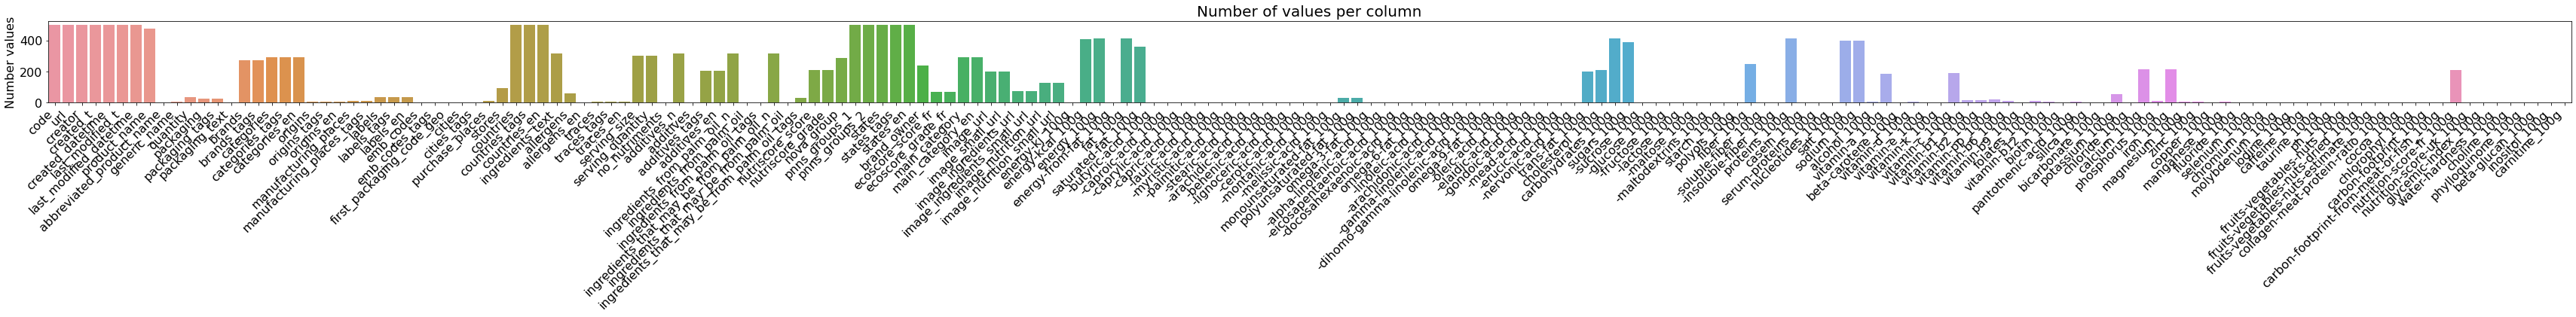

In [6]:
dataframe_distribution_overview(data, figsize=(60, 2))

### Shape comparison with original dataset

Original dataset  
![dataset_100_percent](images/global_overview_100p.png)

In [7]:
features = []

***
## 3.1 General informations group

### 3.1.1 Overview

In [126]:
general_infos_features = data.loc[:, "code":"quantity"].columns
general_infos_features

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'abbreviated_product_name', 'generic_name', 'quantity'],
      dtype='object')

In [127]:
general_infos = data.loc[:, general_infos_features]

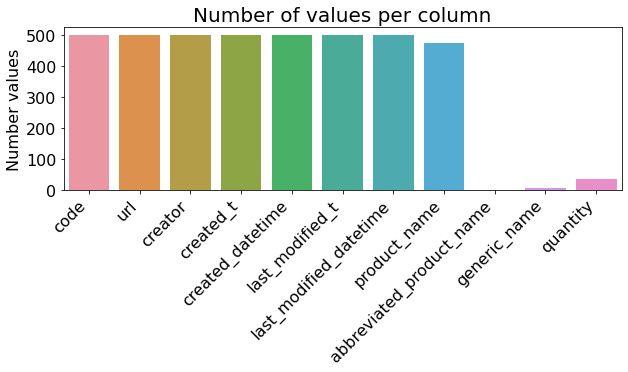

In [10]:
dataframe_distribution_overview(general_infos)

In [11]:
general_infos.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity
6977,11110111333,http://world-en.openfoodfacts.org/product/0011...,org-database-usda,1587637365,2020-04-23T10:22:45Z,1587637366,2020-04-23T10:22:46Z,Jarlsberg cheese & bacon half quiche,NaN,NaN,NaN
8770,11110815095,http://world-en.openfoodfacts.org/product/0011...,usda-ndb-import,1489061831,2017-03-09T12:17:11Z,1587577791,2020-04-22T17:49:51Z,"Diced peeled tomatoes in tomato juice, tomato",NaN,NaN,NaN
5085,10532629488,http://world-en.openfoodfacts.org/product/0010...,usda-ndb-import,1489071263,2017-03-09T14:54:23Z,1587584725,2020-04-22T19:45:25Z,"Mcsteven's, Bloody Massacre Red Party Punch Be...",NaN,NaN,NaN
3196,0008004925008,http://world-en.openfoodfacts.org/product/0008...,bredowmax,1583262185,2020-03-03T19:03:05Z,1628696326,2021-08-11T15:38:46Z,tortellini,NaN,Tortellini,NaN
7208,11110262530,http://world-en.openfoodfacts.org/product/0011...,usda-ndb-import,1489068528,2017-03-09T14:08:48Z,1587582057,2020-04-22T19:00:57Z,"Bakery fresh goodness, pecan pie",NaN,NaN,NaN


In [12]:
general_infos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 6977 to 1462
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   code                      500 non-null    object 
 1   url                       500 non-null    object 
 2   creator                   500 non-null    object 
 3   created_t                 500 non-null    int64  
 4   created_datetime          500 non-null    object 
 5   last_modified_t           500 non-null    int64  
 6   last_modified_datetime    500 non-null    object 
 7   product_name              474 non-null    object 
 8   abbreviated_product_name  0 non-null      float64
 9   generic_name              9 non-null      object 
 10  quantity                  37 non-null     object 
dtypes: float64(1), int64(2), object(8)
memory usage: 46.9+ KB


***
### 3.1.2 Usability

#### 3.1.2.1 Usability: Quantity

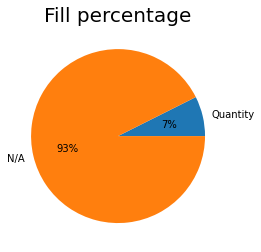

In [13]:
feature_filling(general_infos, "quantity", "Quantity")

In [14]:
general_infos[general_infos.quantity.notna()].quantity.head(10)

770              880 g
977               2 kg
7363    1 Gal (3.78 L)
4001            330 ml
2618            1.5 kg
1021              500g
1764             150 g
3386             500ml
2787             75 cl
2900             450 g
Name: quantity, dtype: object

The feature "quantity" is highly non homogeneous and will be very difficult to use. We will not keep it.

In [133]:
sns.countplot(x="quantity", data=general_infos)

KeyError: 0

In [15]:
general_infos.drop(columns=["quantity"], inplace=True)

#### 3.1.2.2 Usability: abbreviated_product_name

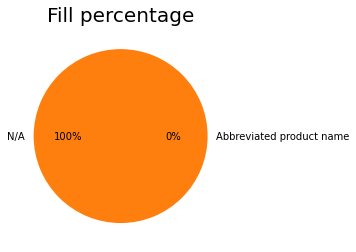

In [16]:
feature_filling(general_infos, "abbreviated_product_name", "Abbreviated product name")

In [17]:
general_infos[general_infos["abbreviated_product_name"].notna()].loc[:, ["abbreviated_product_name"]].head()

,abbreviated_product_name


The fill percentage of 'abbreviated_product_name" is very low, we can rid of it.

In [18]:
general_infos.drop(columns=["abbreviated_product_name"], inplace=True)

#### 3.1.2.3 Usability: generic_name

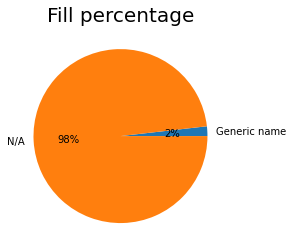

In [19]:
feature_filling(general_infos, "generic_name", "Generic name")

In [20]:
general_infos.drop(columns=["generic_name"], inplace=True)

***
### 3.1.3 Redundancy

***
### 3.1.4 Conclusion

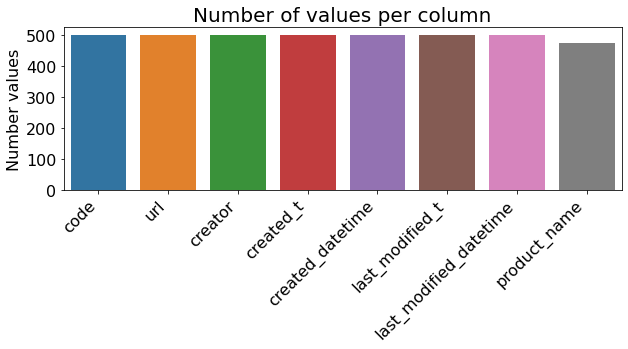

In [21]:
plt.figure(figsize=(10,3))

barplot = sns.barplot(x=general_infos.columns, y=general_infos.count())

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

#### 3.1.4.1 Original

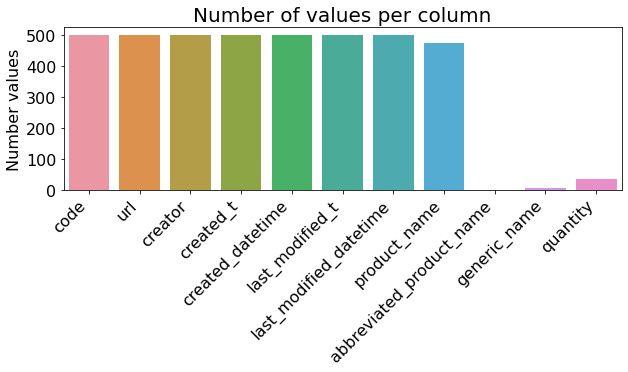

In [22]:
plt.figure(figsize=(10,3))

barplot = sns.barplot(x=general_infos_features, y=data[general_infos_features].count())

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

***
## 3.2 Tags group

### 3.2.1 Overview

In [23]:
tags_features = data.loc[:, "packaging":"countries_en"].columns
tags_features

Index(['packaging', 'packaging_tags', 'packaging_text', 'brands',
       'brands_tags', 'categories', 'categories_tags', 'categories_en',
       'origins', 'origins_tags', 'origins_en', 'manufacturing_places',
       'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_en',
       'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities',
       'cities_tags', 'purchase_places', 'stores', 'countries',
       'countries_tags', 'countries_en'],
      dtype='object')

In [24]:
tags = data.loc[:, tags_features]

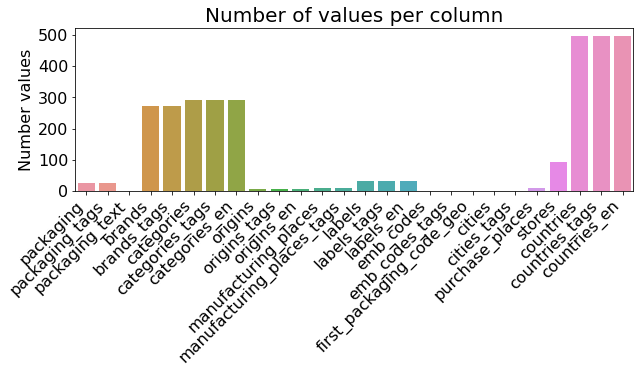

In [25]:
dataframe_distribution_overview(tags)

In [26]:
tags.head()

,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,...,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en
6977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,en:united-states,United States
8770,NaN,NaN,NaN,Kroger,kroger,"Plant-based foods and beverages, Plant-based f...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Kroger,United States,en:united-states,United States
5085,NaN,NaN,NaN,Mcsteven's Inc.,mcsteven-s-inc,"Beverages, Dried products, Dried products to b...","en:beverages,en:dried-products,en:dried-produc...","Beverages,Dried products,Dried products to be ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,en:united-states,United States
3196,NaN,NaN,NaN,Nuovo Pasta,nuovo-pasta,"Meals, Pasta dishes, Stuffed pastas, Tortellini","en:meals,en:pasta-dishes,en:stuffed-pastas,en:...","Meals,Pasta dishes,Stuffed pastas,Tortellini",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Whole Foods,United States,en:united-states,United States
7208,NaN,NaN,NaN,Bakery Fresh Goodness,bakery-fresh-goodness,"Biscuits and cakes, Cakes, Pies, Sweet pies, P...","en:biscuits-and-cakes,en:pies,en:cakes,en:swee...","Biscuits and cakes,Pies,Cakes,Sweet pies,Pecan...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,en:united-states,United States


In [27]:
tags.iloc[:, :13].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 6977 to 1462
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   packaging                  27 non-null     object
 1   packaging_tags             27 non-null     object
 2   packaging_text             0 non-null      object
 3   brands                     274 non-null    object
 4   brands_tags                274 non-null    object
 5   categories                 292 non-null    object
 6   categories_tags            292 non-null    object
 7   categories_en              292 non-null    object
 8   origins                    7 non-null      object
 9   origins_tags               7 non-null      object
 10  origins_en                 7 non-null      object
 11  manufacturing_places       10 non-null     object
 12  manufacturing_places_tags  10 non-null     object
dtypes: object(13)
memory usage: 54.7+ KB


In [28]:
tags.iloc[:, 13:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 6977 to 1462
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   labels                    34 non-null     object 
 1   labels_tags               34 non-null     object 
 2   labels_en                 34 non-null     object 
 3   emb_codes                 0 non-null      object 
 4   emb_codes_tags            0 non-null      object 
 5   first_packaging_code_geo  0 non-null      object 
 6   cities                    0 non-null      float64
 7   cities_tags               0 non-null      object 
 8   purchase_places           10 non-null     object 
 9   stores                    93 non-null     object 
 10  countries                 497 non-null    object 
 11  countries_tags            497 non-null    object 
 12  countries_en              497 non-null    object 
dtypes: float64(1), object(12)
memory usage: 54.7+ KB


***
### 3.2.2 Usability

#### 3.2.2.1 Usability: packaging_text

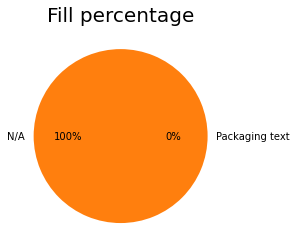

In [29]:
feature_filling(tags, "packaging_text", "Packaging text")

In [30]:
tags.drop(columns=["packaging_text"], inplace=True)

***
#### 3.2.2.2 Usability: cities

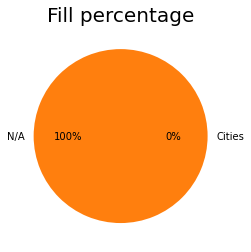

In [31]:
feature_filling(tags, "cities", "Cities")

In [32]:
tags.drop(columns=["cities"], inplace=True)

***
### 3.2.3 Redundancy

#### 3.2.3.1 Redundancy: packaging, packaging_tags

In [33]:
tags.loc[:, ["packaging", "packaging_tags"]].loc[tags.packaging.notna() & tags.packaging_tags.notna()].iloc[:20]

,packaging,packaging_tags
770,"Carton,Plastique","carton,plastique"
977,bucket,bucket
7363,Plastic Bottle,plastic-bottle
4001,"Bouteille,Verre","bouteille,verre"
1021,bag,bag
1764,Barquette plastique,barquette-plastique
2787,bouteille verre,bouteille-verre
3114,"sachet, beutel","sachet,beutel"
2900,"en:aluminium-tray, en:card-sleeve, en:ldpe-film","en-aluminium-tray,en-card-sleeve,en-ldpe-film"
4534,plastic,plastic


In [34]:
tags[tags.packaging_tags.notna()].loc[:,["packaging"]].isna().sum()

packaging    0
dtype: int64

We can see that each time one of the features "packaging" or "packaging_tags" is filled, the other is also filled.
We will keep the feature "packaging" because it transport more information, plus, it's easier to get rid of the "en:", "fr:" than "en-", because in "packaging_tags" each separator is a "-" and not in "packaging".

In [35]:
tags.drop(columns=["packaging_tags"], inplace=True)

***
#### 3.2.3.2 Redundancy: brands, brands_tags

In [36]:
tags.iloc[:20].loc[:, ["brands", "brands_tags"]]

,brands,brands_tags
6977,NaN,NaN
8770,Kroger,kroger
5085,Mcsteven's Inc.,mcsteven-s-inc
3196,Nuovo Pasta,nuovo-pasta
7208,Bakery Fresh Goodness,bakery-fresh-goodness
9700,NaN,NaN
9027,Kroger,kroger
9624,Kroger,kroger
1679,NaN,NaN
5286,NaN,NaN


In [37]:
tags[tags.brands_tags.notna()].loc[:,["brands"]].isna().sum()

brands    0
dtype: int64

The features "brands" and "brands_tags" are almost equally filled. We will keep "brands" because this feature carry most information (spaces, capital letters...)

In [38]:
tags.drop(columns=["brands_tags"], inplace=True)

***
#### 3.2.3.3 Redundancy: categories, categories_tags, categories_en

In [39]:
tags.loc[:, ["categories", "categories_tags", "categories_en"]].iloc[:20]

,categories,categories_tags,categories_en
6977,NaN,NaN,NaN
8770,"Plant-based foods and beverages, Plant-based f...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo..."
5085,"Beverages, Dried products, Dried products to b...","en:beverages,en:dried-products,en:dried-produc...","Beverages,Dried products,Dried products to be ..."
3196,"Meals, Pasta dishes, Stuffed pastas, Tortellini","en:meals,en:pasta-dishes,en:stuffed-pastas,en:...","Meals,Pasta dishes,Stuffed pastas,Tortellini"
7208,"Biscuits and cakes, Cakes, Pies, Sweet pies, P...","en:biscuits-and-cakes,en:pies,en:cakes,en:swee...","Biscuits and cakes,Pies,Cakes,Sweet pies,Pecan..."
9700,NaN,NaN,NaN
9027,"Sandwiches, Hamburgers","en:sandwiches,en:hamburgers","Sandwiches,Hamburgers"
9624,Fats,en:fats,Fats
1679,NaN,NaN,NaN
5286,"Snacks, Sweet snacks, Confectioneries","en:snacks,en:sweet-snacks,en:confectioneries","Snacks,Sweet snacks,Confectioneries"


In [40]:
tags[tags.categories.notna()].loc[:,["categories_en"]].isna().sum()

categories_en    0
dtype: int64

In [41]:
tags[tags.categories_tags.notna()].loc[:,["categories_en"]].isna().sum()

categories_en    0
dtype: int64

We will keep "categories_en".

In [42]:
tags.drop(columns=["categories", "categories_tags"], inplace=True)

***
#### 3.2.3.4 Redundancy: origins, origins_tags, origins_en

In [43]:
tags.loc[:, ["origins", "origins_tags", "origins_en"]].loc[tags.origins.notna() & tags.origins_tags.notna() & tags.origins_en.notna()].iloc[:20]

,origins,origins_tags,origins_en
7363,United States,en:united-states,United States
1021,Germany,en:germany,Germany
2787,France,en:france,France
2515,France,en:france,France
3106,Sicily,"en:italy,en:sicily","Italy,Sicily"
2405,Royaume-Uni,en:united-kingdom,United Kingdom
4341,Royaume-Uni,en:united-kingdom,United Kingdom


In [44]:
tags[tags.origins_tags.notna()].loc[:,["origins"]].isna().sum()

origins    0
dtype: int64

In [45]:
tags[tags.origins_en.notna()].loc[:,["origins"]].isna().sum()

origins    0
dtype: int64

We will keep the feature "origins"

In [46]:
tags.drop(columns=["origins_tags", "origins_en"], inplace=True)

***
#### 3.2.3.5 Redundancy: manufacturing_places, manufacturing_places_tags

In [47]:
tags.loc[:, ["manufacturing_places", "manufacturing_places_tags"]].loc[tags.manufacturing_places.notna() & tags.manufacturing_places_tags.notna()].iloc[:20]

,manufacturing_places,manufacturing_places_tags
770,"Saint Yrieix,France","saint-yrieix,france"
977,Germany,germany
7363,United States,united-states
4001,Angleterre,angleterre
1021,Germany,germany
2787,France,france
4534,Poland,poland
3106,France,france
2405,Royaume-Uni,royaume-uni
4341,Royaume-Uni,royaume-uni


We will keep the feature "manufacturing_places"

In [48]:
tags.drop(columns=["manufacturing_places_tags"], inplace=True)

***
#### 3.2.3.6 labels, labels_tags, labels_en

In [49]:
tags.loc[:, ["labels", "labels_tags", "labels_en"]].loc[tags.labels.notna() & tags.labels_en.notna() & tags.labels_en.notna()].iloc[:20]

,labels,labels_tags,labels_en
977,"Vegetarisch, Vegan","en:vegetarian,en:vegan","Vegetarian,Vegan"
2107,"Nutriscore, Nutriscore B","en:nutriscore,en:nutriscore-grade-b","Nutriscore,Nutriscore Grade B"
7363,"Organic,Grade A,Pasteurized product,Homonogize...","en:organic,en:usda-organic,en:pasteurized-prod...","Organic,USDA Organic,Pasteurized product,Grade..."
2577,"Nutriscore, Nutriscore B","en:nutriscore,en:nutriscore-grade-b","Nutriscore,Nutriscore Grade B"
90,Bio,en:organic,Organic
4001,Déconseillé à certaines catégories de personne...,"en:not-advised-for-specific-people,fr:deconsei...","Not advised for specific people,fr:Déconseillé..."
248,Organic,en:organic,Organic
1143,"Bio, Sans gluten, Sans lactose","en:organic,en:no-gluten,en:no-lactose","Organic,No gluten,No lactose"
1031,"en:gluten-free, Sans conservateurs","en:no-gluten,en:no-preservatives","No gluten,No preservatives"
3386,"Gluten-free, en:it-bio-008","en:organic,en:eu-organic,en:gluten-free,en:it-...","Organic,EU Organic,Gluten-free,IT-BIO-008"


We will keep "labels_en"

In [50]:
tags.drop(columns=["labels", "labels_tags"], inplace=True)

***
#### 3.2.3.7 emb_codes, emb_codes_tags

In [51]:
tags.loc[:, ["emb_codes", "emb_codes_tags"]].loc[tags.emb_codes.notna() & tags.emb_codes_tags.notna()].iloc[:20]

,emb_codes,emb_codes_tags


We will keep "emb_codes".

In [52]:
tags.drop(columns=["emb_codes_tags"], inplace=True)

***
#### 3.2.3.8 countries, countries_tags, countries_en

In [53]:
tags.iloc[:20,:].loc[:,["countries", "countries_tags", "countries_en"]]

,countries,countries_tags,countries_en
6977,United States,en:united-states,United States
8770,United States,en:united-states,United States
5085,United States,en:united-states,United States
3196,United States,en:united-states,United States
7208,United States,en:united-states,United States
9700,United States,en:united-states,United States
9027,United States,en:united-states,United States
9624,United States,en:united-states,United States
1679,en:it,en:italy,Italy
5286,United States,en:united-states,United States


In [54]:
fill_infos(tags, "countries_en")

countries_en total rows:  497
countries_en filled count:  494
countries_en filled percentage:  1.6566666666666667


In [55]:
tags.drop(columns=["countries", "countries_tags"], inplace=True)

***
### 3.2.4 Conclusion

In [56]:
tags.describe()

,packaging,brands,categories_en,origins,manufacturing_places,labels_en,emb_codes,first_packaging_code_geo,cities_tags,purchase_places,stores,countries_en
count,27,274,292,7,10,34,0,0,0,10,93,497
unique,24,118,128,5,7,22,0,0,0,8,9,19
top,en:hdpe-bottle,Kroger,"Biscuits and cakes,Cakes",France,Germany,Organic,NaN,NaN,NaN,Germany,Kroger,United States
freq,2,74,17,2,2,9,NaN,NaN,NaN,2,74,341


In [57]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 6977 to 1462
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   packaging                 27 non-null     object
 1   brands                    274 non-null    object
 2   categories_en             292 non-null    object
 3   origins                   7 non-null      object
 4   manufacturing_places      10 non-null     object
 5   labels_en                 34 non-null     object
 6   emb_codes                 0 non-null      object
 7   first_packaging_code_geo  0 non-null      object
 8   cities_tags               0 non-null      object
 9   purchase_places           10 non-null     object
 10  stores                    93 non-null     object
 11  countries_en              497 non-null    object
dtypes: object(12)
memory usage: 50.8+ KB


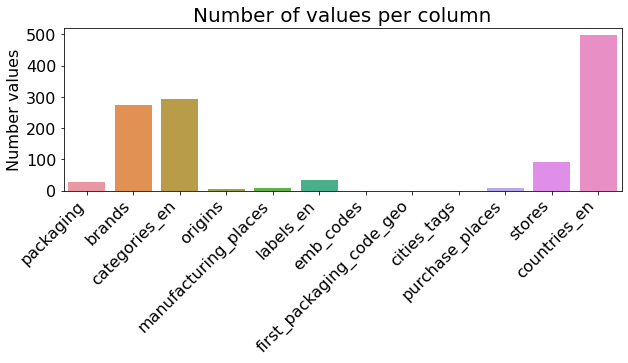

In [58]:
dataframe_distribution_overview(tags)

#### 3.2.4.1 Original

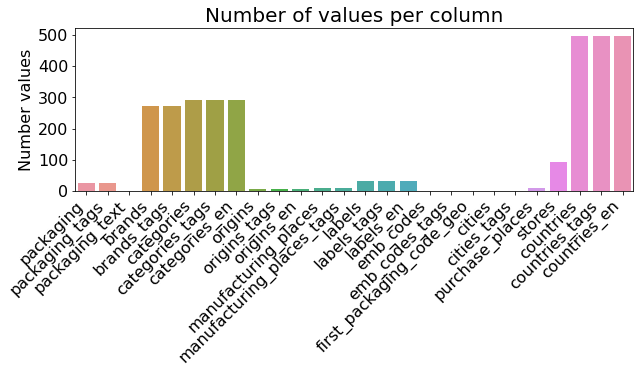

In [59]:
dataframe_distribution_overview(data[tags_features])

***
## 3.3 Ingredients group

### 3.3.1 Overview

In [60]:
ingredients_features = data.loc[:, "ingredients_text":"traces_tags"].columns
ingredients_features

Index(['ingredients_text', 'allergens', 'allergens_en', 'traces',
       'traces_tags'],
      dtype='object')

In [61]:
ingredients = data.loc[:, ingredients_features]

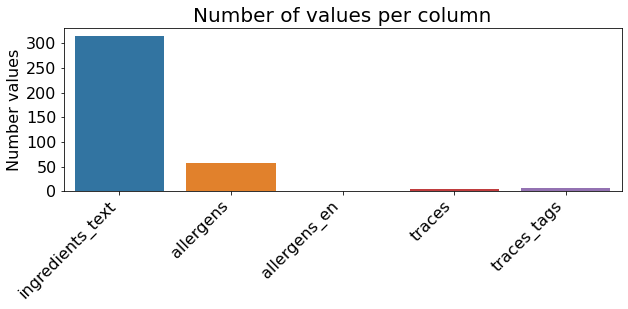

In [62]:
dataframe_distribution_overview(ingredients)

In [63]:
ingredients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 6977 to 1462
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ingredients_text  315 non-null    object 
 1   allergens         58 non-null     object 
 2   allergens_en      0 non-null      float64
 3   traces            5 non-null      object 
 4   traces_tags       7 non-null      object 
dtypes: float64(1), object(4)
memory usage: 23.4+ KB


In [64]:
ingredients.head()

,ingredients_text,allergens,allergens_en,traces,traces_tags
6977,"Crust (enriched wheat flour [contains niacin, ...","en:eggs,en:milk",NaN,NaN,NaN
8770,"Tomatoes, tomato juice, less than 2% of: calci...",NaN,NaN,NaN,NaN
5085,"Sugar, maltodextrin, natural and artificial fl...",NaN,NaN,NaN,NaN
3196,NaN,NaN,NaN,NaN,NaN
7208,"Corn syrup, enriched flour (wheat flour, niaci...",NaN,NaN,NaN,NaN


***
### 3.3.2 Usability

#### 3.3.2.1 Usability: allergens_en

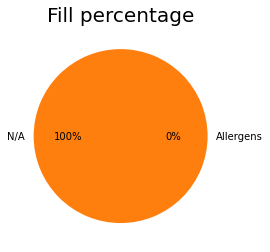

In [65]:
feature_filling(ingredients, "allergens_en", "Allergens")

In [66]:
ingredients.drop(columns=["allergens_en"], inplace=True)

***
### 3.3.3 Redundancy

#### 3.3.3.1 Redundancy: traces, traces_tags

In [67]:
ingredients.loc[:, ["traces", "traces_tags"]].loc[ingredients.traces.notna() & ingredients.traces_tags.notna()].iloc[:20]

,traces,traces_tags
770,"en:nuts,en:soybeans","en:nuts,en:soybeans"
977,"en:gluten,en:milk,en:nuts","en:gluten,en:milk,en:nuts"
1021,"en:gluten,en:milk,en:nuts","en:gluten,en:milk,en:nuts"
4534,"en:gluten,en:soybeans,en:CONTAINS: MILK,en:TRE...","en:gluten,en:soybeans,en:contains-milk,en:tree..."
4341,"en:nuts,en:peanuts","en:nuts,en:peanuts"


There is, at first sight, no better feature. We will keep "traces"

In [68]:
ingredients.drop(columns=["traces_tags"], inplace=True)

***
### 3.3.4 Conclusion

In [69]:
ingredients.describe()

,ingredients_text,allergens,traces
count,315,58,5
unique,305,20,4
top,"Semolina, niacin, ferrous sulfate, thiamin mon...",en:milk,"en:gluten,en:milk,en:nuts"
freq,3,17,2


In [70]:
ingredients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 6977 to 1462
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ingredients_text  315 non-null    object
 1   allergens         58 non-null     object
 2   traces            5 non-null      object
dtypes: object(3)
memory usage: 15.6+ KB


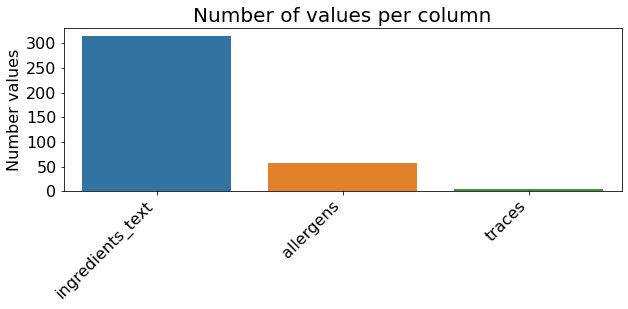

In [71]:
dataframe_distribution_overview(ingredients)

#### 3.3.4.1 Original

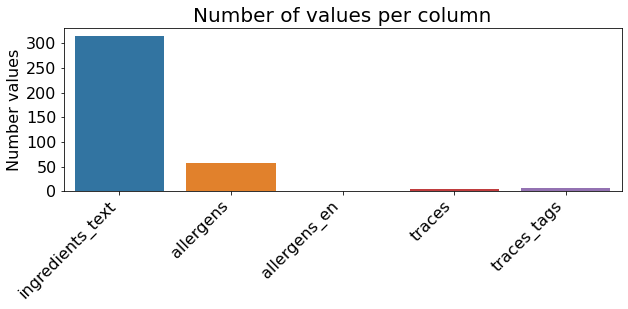

In [72]:
dataframe_distribution_overview(data[ingredients_features])

***
## 3.4 Misc datas group

#### 3.4.1 Overview

In [73]:
misc_features = data.loc[:,"serving_size":"image_nutrition_small_url"].columns
misc_features

Index(['serving_size', 'serving_quantity', 'no_nutriments', 'additives_n',
       'additives', 'additives_tags', 'additives_en',
       'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil',
       'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil',
       'ingredients_that_may_be_from_palm_oil_tags', 'nutriscore_score',
       'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2',
       'states', 'states_tags', 'states_en', 'brand_owner',
       'ecoscore_score_fr', 'ecoscore_grade_fr', 'main_category',
       'main_category_en', 'image_url', 'image_small_url',
       'image_ingredients_url', 'image_ingredients_small_url',
       'image_nutrition_url', 'image_nutrition_small_url'],
      dtype='object')

In [74]:
misc = data.loc[:, misc_features]

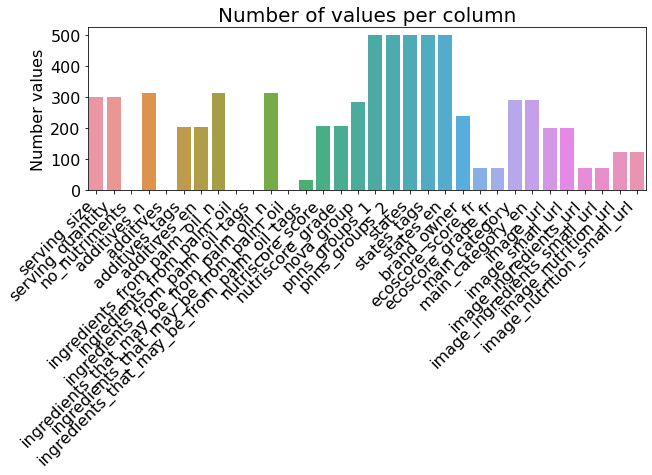

In [75]:
dataframe_distribution_overview(misc)

In [76]:
misc.iloc[:, :16].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 6977 to 1462
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   serving_size                                302 non-null    object 
 1   serving_quantity                            302 non-null    float64
 2   no_nutriments                               0 non-null      float64
 3   additives_n                                 315 non-null    float64
 4   additives                                   0 non-null      float64
 5   additives_tags                              203 non-null    object 
 6   additives_en                                203 non-null    object 
 7   ingredients_from_palm_oil_n                 315 non-null    float64
 8   ingredients_from_palm_oil                   0 non-null      float64
 9   ingredients_from_palm_oil_tags              2 non-null      object 
 10  ingredient

In [77]:
misc.iloc[:, 16:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 6977 to 1462
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pnns_groups_1                500 non-null    object 
 1   pnns_groups_2                500 non-null    object 
 2   states                       500 non-null    object 
 3   states_tags                  500 non-null    object 
 4   states_en                    500 non-null    object 
 5   brand_owner                  240 non-null    object 
 6   ecoscore_score_fr            71 non-null     float64
 7   ecoscore_grade_fr            71 non-null     object 
 8   main_category                292 non-null    object 
 9   main_category_en             292 non-null    object 
 10  image_url                    200 non-null    object 
 11  image_small_url              200 non-null    object 
 12  image_ingredients_url        73 non-null     object 
 13  image_ingredient

In [78]:
misc.head(1)

,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,...,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url
6977,0.33 QUICHE (151 g),151.0,NaN,11.0,NaN,"en:e102,en:e110,en:e160b,en:e250,en:e282,en:e3...","E102 - Tartrazine,E110 - Sunset yellow FCF,E16...",0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***
### 3.4.2 Usability

These features are competely empty and then will be no needed:
- no_nutriments
- additives
- ingredients_from_palm_oil
- ingredients_that_may_be_from_palm_oil

These features are almost empty, we will get rid of them too:
- ingredients_from_palm_oil_tags
- ingredients_that_may_be_from_palm_oil_tags

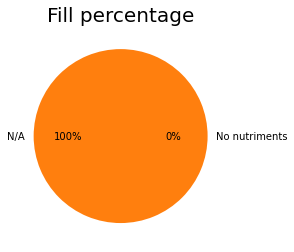

In [79]:
feature_filling(misc, "no_nutriments", "No nutriments")

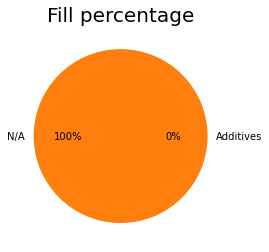

In [80]:
feature_filling(misc, "additives", "Additives")

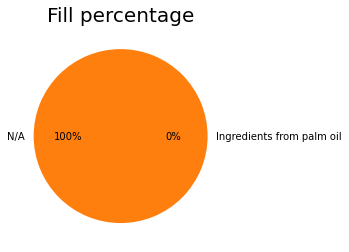

In [81]:
feature_filling(misc, "ingredients_from_palm_oil", "Ingredients from palm oil")

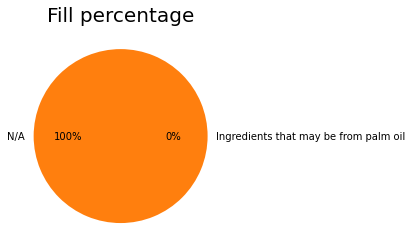

In [82]:
feature_filling(misc, "ingredients_that_may_be_from_palm_oil", "Ingredients that may be from palm oil")

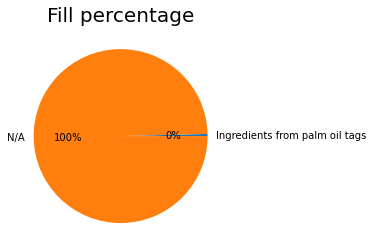

In [83]:
feature_filling(misc, "ingredients_from_palm_oil_tags", "Ingredients from palm oil tags")

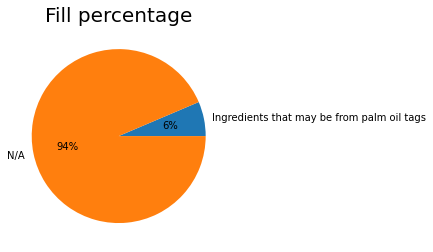

In [84]:
feature_filling(misc, "ingredients_that_may_be_from_palm_oil_tags", "Ingredients that may be from palm oil tags")

In [85]:
misc.drop(columns=["no_nutriments", "additives", "ingredients_from_palm_oil", "ingredients_that_may_be_from_palm_oil", "ingredients_from_palm_oil_tags", "ingredients_that_may_be_from_palm_oil_tags"], inplace=True)

***
### 3.4.3 Redundancy

#### 3.4.3.1 Redundancy: serving_siez, serving_quantity

In [86]:
misc.loc[:, ["serving_size", "serving_quantity"]].iloc[:20]

,serving_size,serving_quantity
6977,0.33 QUICHE (151 g),151.0
8770,1/2 cup (121 g),121.0
5085,1 ONZ (28 g),28.0
3196,NaN,NaN
7208,0.17 PIE (92 g),92.0
9700,1 Tbsp (15 ml),15.0
9027,29 g (0.25 cup),29.0
9624,2 Tbsp (37 g),37.0
1679,NaN,NaN
5286,2 Pieces (40 g),40.0


It appears that the feature "serving_size" is non homogeneous in term of units. The feature "serving_quantity" on the other hand, seems to be only in the same unit (g).
We will keep "serving_quantity"

In [87]:
misc.drop(columns=["serving_size"], inplace=True)

***
#### 3.4.3.2 Redundancy: additives_tags, additives_en

In [88]:
misc.loc[:, ["additives_n", "additives_tags", "additives_en"]].iloc[:10]

,additives_n,additives_tags,additives_en
6977,11.0,"en:e102,en:e110,en:e160b,en:e250,en:e282,en:e3...","E102 - Tartrazine,E110 - Sunset yellow FCF,E16..."
8770,1.0,en:e330,E330 - Citric acid
5085,3.0,"en:e129,en:e160a,en:e160ai,en:e330","E129 - Allura red ac,E160a - Carotene,E160ai -..."
3196,NaN,NaN,NaN
7208,3.0,"en:e282,en:e385,en:e471","E282 - Calcium propionate,E385 - Calcium disod..."
9700,0.0,NaN,NaN
9027,7.0,"en:e160c,en:e270,en:e339ii,en:e452,en:e452i,en...","E160c - Paprika extract,E270 - Lactic acid,E33..."
9624,2.0,"en:e322,en:e322i,en:e503,en:e503ii","E322 - Lecithins,E322i - Lecithin,E503 - Ammon..."
1679,NaN,NaN,NaN
5286,2.0,"en:e407,en:e471","E407 - Carrageenan,E471 - Mono- and diglycerid..."


The feature "additives_en" contains more informations and seems to be easier to parse compare to "additives_tags". Regarding "additives_n" it's the number of additives, there is no direct redundancy for that feature, we can keep it.
We will keep "additives_en" and "additives_n".

In [89]:
misc.drop(columns=["additives_tags"], inplace=True)

***
#### 3.4.3.3 Redundancy: nutriscore_score, nutriscore_grade

In [90]:
misc.loc[:, ["nutriscore_score", "nutriscore_grade"]].loc[misc.nutriscore_score.notna() & misc.nutriscore_grade.notna()].iloc[:20]

,nutriscore_score,nutriscore_grade
8770,-5.0,a
3196,3.0,c
7208,16.0,d
9027,11.0,d
9624,21.0,e
5286,14.0,d
7305,1.0,b
7853,23.0,e
7669,5.0,c
9828,5.0,c


We will keep both fields as one is quantitative and other is qualitative.

***
#### 3.4.3.4 Redundancy: pnns_groups_1, pnns_groups_2

In [91]:
misc.loc[:, ["pnns_groups_1", "pnns_groups_2"]].loc[misc.pnns_groups_1.notna()].iloc[:20]

,pnns_groups_1,pnns_groups_2
6977,unknown,unknown
8770,Fruits and vegetables,Vegetables
5085,Beverages,Sweetened beverages
3196,Composite foods,One-dish meals
7208,Sugary snacks,Biscuits and cakes
9700,unknown,unknown
9027,Composite foods,Sandwiches
9624,Fat and sauces,Fats
1679,unknown,unknown
5286,Sugary snacks,Sweets


Both features don't contains same value, we will keep them.

***
#### 3.4.3.5 Redundancy: states, states_tags, states_en

In [92]:
misc.loc[:, ["states", "states_tags", "states_en"]].iloc[:10]

,states,states_tags,states_en
6977,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
8770,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
5085,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
3196,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
7208,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
9700,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
9027,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
9624,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
1679,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
5286,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."


Seems to be all useless. Let's see how many rows doesn't contains 'to-be-completed' or 'To be completed' in those features.

In [93]:
misc.loc[~misc.states.str.contains("to-be-completed")].states.count()

0

In [94]:
misc.loc[~misc.states_tags.str.contains("to-be-completed")].states_tags.count()

0

In [95]:
misc.loc[~misc.states_en.str.contains("To be completed")].states_en.count()

5

These features contains no usefull informations, we will get rid of them.

In [96]:
misc.drop(columns=["states", "states_tags", "states_en"], inplace=True)

***
#### 3.4.3.6 Redundancy: ecoscore_score_fr, ecoscore_grade_fr

In [97]:
misc.loc[:, ["ecoscore_score_fr", "ecoscore_grade_fr"]].loc[misc.ecoscore_score_fr.notna() & misc.ecoscore_grade_fr.notna()].iloc[:20]

,ecoscore_score_fr,ecoscore_grade_fr
8770,77.0,b
7305,34.0,d
7853,34.0,d
770,59.0,c
3255,38.0,d
7284,35.0,d
7363,45.0,c
9587,34.0,d
90,62.0,b
4001,50.0,c


As the nutriscore, both ecoscore are usefull, we will keep both.

***
#### 3.4.3.7 Redundancy: main_category, main_category_en

In [98]:
misc.loc[:, ["main_category", "main_category_en"]].iloc[:20]

,main_category,main_category_en
6977,NaN,NaN
8770,en:tomatoes,Tomatoes
5085,en:dehydrated-beverages,Dehydrated beverages
3196,en:tortellini,Tortellini
7208,en:pecan-pies,Pecan pies
9700,NaN,NaN
9027,en:hamburgers,Hamburgers
9624,en:fats,Fats
1679,NaN,NaN
5286,en:confectioneries,Confectioneries


We will keep "main_category_en"

In [99]:
misc.drop(columns=["main_category"], inplace=True)

***
### 3.4.4 Conclusion

In [100]:
misc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 6977 to 1462
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   serving_quantity                         302 non-null    float64
 1   additives_n                              315 non-null    float64
 2   additives_en                             203 non-null    object 
 3   ingredients_from_palm_oil_n              315 non-null    float64
 4   ingredients_that_may_be_from_palm_oil_n  315 non-null    float64
 5   nutriscore_score                         208 non-null    float64
 6   nutriscore_grade                         208 non-null    object 
 7   nova_group                               285 non-null    float64
 8   pnns_groups_1                            500 non-null    object 
 9   pnns_groups_2                            500 non-null    object 
 10  brand_owner                              240 n

In [101]:
misc.describe()

,serving_quantity,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nova_group,ecoscore_score_fr
count,302.000000,315.000000,315.000000,315.000000,208.000000,285.000000,71.000000
mean,78.323253,3.085714,0.006349,0.111111,10.423077,3.550877,49.380282
std,90.949459,4.376648,0.079555,0.343785,9.733842,0.897007,20.923238
min,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,14.000000
25%,28.000000,0.000000,0.000000,0.000000,1.000000,3.000000,34.000000
50%,40.000000,1.000000,0.000000,0.000000,11.000000,4.000000,45.000000
75%,100.000000,4.000000,0.000000,0.000000,18.250000,4.000000,70.500000
max,507.000000,26.000000,1.000000,2.000000,27.000000,4.000000,91.000000


In [102]:
misc.loc[:, :"main_category_en"].describe(include=[object])

,additives_en,nutriscore_grade,pnns_groups_1,pnns_groups_2,brand_owner,ecoscore_grade_fr,main_category_en
count,203,208,500,500,240,71,292
unique,161,5,11,30,47,4,123
top,E330 - Citric acid,e,unknown,unknown,The Kroger Co.,d,Cakes
freq,13,56,284,284,128,31,17


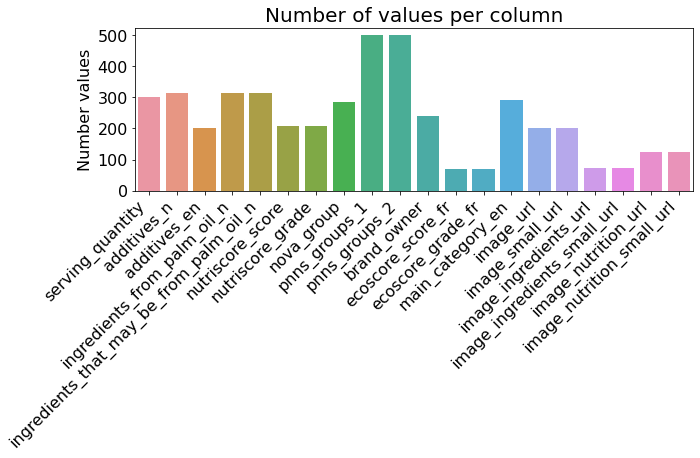

In [103]:
dataframe_distribution_overview(misc)

#### 3.4.4.1 Original

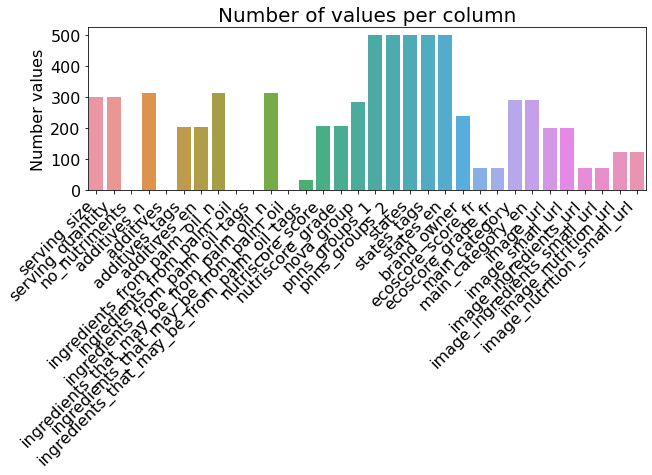

In [104]:
dataframe_distribution_overview(data[misc_features])

***
## 3.5 Nutrition facts group

### 3.5.1 Overview

In [105]:
nutr_features = data.loc[:, "energy-kj_100g":"carnitine_100g"].columns
nutr_features

Index(['energy-kj_100g', 'energy-kcal_100g', 'energy_100g',
       'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g',
       '-butyric-acid_100g', '-caproic-acid_100g', '-caprylic-acid_100g',
       '-capric-acid_100g',
       ...
       'carbon-footprint-from-meat-or-fish_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g', 'water-hardness_100g',
       'choline_100g', 'phylloquinone_100g', 'beta-glucan_100g',
       'inositol_100g', 'carnitine_100g'],
      dtype='object', length=111)

In [106]:
nutr = data.loc[:, nutr_features]

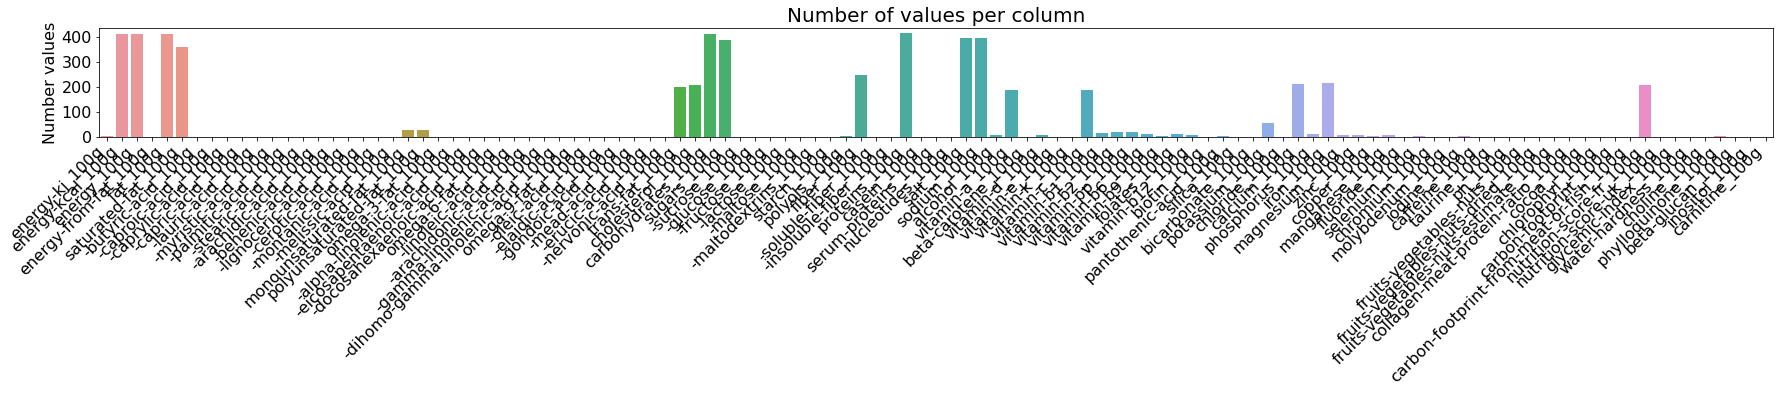

In [107]:
dataframe_distribution_overview(nutr, figsize=(30, 2))

In [108]:
nutr.iloc[:, :10].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 6977 to 1462
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   energy-kj_100g        3 non-null      float64
 1   energy-kcal_100g      409 non-null    float64
 2   energy_100g           412 non-null    float64
 3   energy-from-fat_100g  1 non-null      float64
 4   fat_100g              412 non-null    float64
 5   saturated-fat_100g    358 non-null    float64
 6   -butyric-acid_100g    0 non-null      float64
 7   -caproic-acid_100g    0 non-null      float64
 8   -caprylic-acid_100g   0 non-null      float64
 9   -capric-acid_100g     0 non-null      float64
dtypes: float64(10)
memory usage: 43.0 KB


In [109]:
nutr.iloc[:, 10:20].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 6977 to 1462
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   -lauric-acid_100g      0 non-null      float64
 1   -myristic-acid_100g    0 non-null      float64
 2   -palmitic-acid_100g    0 non-null      float64
 3   -stearic-acid_100g     0 non-null      float64
 4   -arachidic-acid_100g   0 non-null      float64
 5   -behenic-acid_100g     0 non-null      float64
 6   -lignoceric-acid_100g  0 non-null      float64
 7   -cerotic-acid_100g     0 non-null      float64
 8   -montanic-acid_100g    0 non-null      float64
 9   -melissic-acid_100g    0 non-null      float64
dtypes: float64(10)
memory usage: 43.0 KB


In [110]:
nutr.iloc[:, 20:30].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 6977 to 1462
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   monounsaturated-fat_100g     29 non-null     float64
 1   polyunsaturated-fat_100g     29 non-null     float64
 2   omega-3-fat_100g             0 non-null      float64
 3   -alpha-linolenic-acid_100g   0 non-null      float64
 4   -eicosapentaenoic-acid_100g  0 non-null      float64
 5   -docosahexaenoic-acid_100g   0 non-null      float64
 6   omega-6-fat_100g             0 non-null      float64
 7   -linoleic-acid_100g          0 non-null      float64
 8   -arachidonic-acid_100g       0 non-null      float64
 9   -gamma-linolenic-acid_100g   0 non-null      float64
dtypes: float64(10)
memory usage: 43.0 KB


In [111]:
nutr.iloc[:, 30:40].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 6977 to 1462
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   -dihomo-gamma-linolenic-acid_100g  0 non-null      float64
 1   omega-9-fat_100g                   0 non-null      float64
 2   -oleic-acid_100g                   0 non-null      float64
 3   -elaidic-acid_100g                 0 non-null      float64
 4   -gondoic-acid_100g                 0 non-null      float64
 5   -mead-acid_100g                    0 non-null      float64
 6   -erucic-acid_100g                  0 non-null      float64
 7   -nervonic-acid_100g                0 non-null      float64
 8   trans-fat_100g                     199 non-null    float64
 9   cholesterol_100g                   208 non-null    float64
dtypes: float64(10)
memory usage: 43.0 KB


In [112]:
nutr.iloc[:, 40:50].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 6977 to 1462
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   carbohydrates_100g   411 non-null    float64
 1   sugars_100g          386 non-null    float64
 2   -sucrose_100g        0 non-null      float64
 3   -glucose_100g        0 non-null      float64
 4   -fructose_100g       0 non-null      float64
 5   -lactose_100g        0 non-null      float64
 6   -maltose_100g        0 non-null      float64
 7   -maltodextrins_100g  0 non-null      float64
 8   starch_100g          0 non-null      float64
 9   polyols_100g         2 non-null      float64
dtypes: float64(10)
memory usage: 43.0 KB


In [113]:
nutr.iloc[:, 50:60].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 6977 to 1462
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fiber_100g             248 non-null    float64
 1   -soluble-fiber_100g    0 non-null      float64
 2   -insoluble-fiber_100g  0 non-null      float64
 3   proteins_100g          413 non-null    float64
 4   casein_100g            0 non-null      float64
 5   serum-proteins_100g    0 non-null      float64
 6   nucleotides_100g       0 non-null      float64
 7   salt_100g              396 non-null    float64
 8   sodium_100g            396 non-null    float64
 9   alcohol_100g           6 non-null      float64
dtypes: float64(10)
memory usage: 43.0 KB


In [114]:
nutr.iloc[:, 60:70].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 6977 to 1462
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   vitamin-a_100g      187 non-null    float64
 1   beta-carotene_100g  0 non-null      float64
 2   vitamin-d_100g      6 non-null      float64
 3   vitamin-e_100g      0 non-null      float64
 4   vitamin-k_100g      0 non-null      float64
 5   vitamin-c_100g      189 non-null    float64
 6   vitamin-b1_100g     17 non-null     float64
 7   vitamin-b2_100g     18 non-null     float64
 8   vitamin-pp_100g     19 non-null     float64
 9   vitamin-b6_100g     10 non-null     float64
dtypes: float64(10)
memory usage: 43.0 KB


In [115]:
nutr.iloc[:, 70:80].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 6977 to 1462
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   vitamin-b9_100g        4 non-null      float64
 1   folates_100g           12 non-null     float64
 2   vitamin-b12_100g       9 non-null      float64
 3   biotin_100g            0 non-null      float64
 4   pantothenic-acid_100g  5 non-null      float64
 5   silica_100g            0 non-null      float64
 6   bicarbonate_100g       0 non-null      float64
 7   potassium_100g         57 non-null     float64
 8   chloride_100g          0 non-null      float64
 9   calcium_100g           213 non-null    float64
dtypes: float64(10)
memory usage: 43.0 KB


In [116]:
nutr.iloc[:, 80:90].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 6977 to 1462
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   phosphorus_100g  10 non-null     float64
 1   iron_100g        214 non-null    float64
 2   magnesium_100g   7 non-null      float64
 3   zinc_100g        6 non-null      float64
 4   copper_100g      4 non-null      float64
 5   manganese_100g   6 non-null      float64
 6   fluoride_100g    0 non-null      float64
 7   selenium_100g    3 non-null      float64
 8   chromium_100g    0 non-null      float64
 9   molybdenum_100g  0 non-null      float64
dtypes: float64(10)
memory usage: 43.0 KB


In [117]:
nutr.iloc[:, 90:100].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 6977 to 1462
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   iodine_100g                           4 non-null      float64
 1   caffeine_100g                         0 non-null      float64
 2   taurine_100g                          0 non-null      float64
 3   ph_100g                               0 non-null      float64
 4   fruits-vegetables-nuts_100g           0 non-null      float64
 5   fruits-vegetables-nuts-dried_100g     0 non-null      float64
 6   fruits-vegetables-nuts-estimate_100g  0 non-null      float64
 7   collagen-meat-protein-ratio_100g      0 non-null      float64
 8   cocoa_100g                            0 non-null      float64
 9   chlorophyl_100g                       0 non-null      float64
dtypes: float64(10)
memory usage: 43.0 KB


In [118]:
nutr.iloc[:, 100:110].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 6977 to 1462
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   carbon-footprint_100g                    0 non-null      float64
 1   carbon-footprint-from-meat-or-fish_100g  1 non-null      float64
 2   nutrition-score-fr_100g                  208 non-null    float64
 3   nutrition-score-uk_100g                  0 non-null      float64
 4   glycemic-index_100g                      0 non-null      float64
 5   water-hardness_100g                      0 non-null      float64
 6   choline_100g                             0 non-null      float64
 7   phylloquinone_100g                       4 non-null      float64
 8   beta-glucan_100g                         0 non-null      float64
 9   inositol_100g                            0 non-null      float64
dtypes: float64(10)
memory usage: 43.0 KB


In [119]:
nutr.iloc[:, 110:120].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 6977 to 1462
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carnitine_100g  0 non-null      float64
dtypes: float64(1)
memory usage: 7.8 KB


***
### 3.5.2 Usability

All features that have less than 1% fill percentage will be dropped.

In [120]:
index_lesser_than_percentage = index_lth(pd, np, nutr, 5)
index_lesser_than_percentage

Index(['energy-kj_100g', 'energy-from-fat_100g', '-butyric-acid_100g',
       '-caproic-acid_100g', '-caprylic-acid_100g', '-capric-acid_100g',
       '-lauric-acid_100g', '-myristic-acid_100g', '-palmitic-acid_100g',
       '-stearic-acid_100g', '-arachidic-acid_100g', '-behenic-acid_100g',
       '-lignoceric-acid_100g', '-cerotic-acid_100g', '-montanic-acid_100g',
       '-melissic-acid_100g', 'omega-3-fat_100g', '-alpha-linolenic-acid_100g',
       '-eicosapentaenoic-acid_100g', '-docosahexaenoic-acid_100g',
       'omega-6-fat_100g', '-linoleic-acid_100g', '-arachidonic-acid_100g',
       '-gamma-linolenic-acid_100g', '-dihomo-gamma-linolenic-acid_100g',
       'omega-9-fat_100g', '-oleic-acid_100g', '-elaidic-acid_100g',
       '-gondoic-acid_100g', '-mead-acid_100g', '-erucic-acid_100g',
       '-nervonic-acid_100g', '-sucrose_100g', '-glucose_100g',
       '-fructose_100g', '-lactose_100g', '-maltose_100g',
       '-maltodextrins_100g', 'starch_100g', 'polyols_100g',
       '-s

In [121]:
nutr.drop(columns=index_lesser_than_percentage, inplace=True)

***
### 3.5.3 Redundancy

#### 3.5.3.1 Redundancy: nutrition-score-fr_100g

nutrition-score-fr_100g is redundant with "nutriscore_score" and "nutriscore_grade". It will be dropped.

In [122]:
nutr.drop(columns=["nutrition-score-fr_100g"], inplace=True)

***
#### 3.5.3.2 Redundancy: energy-kj_100g, energy-kcal_100g, energy_100g

In [123]:
nutr.loc[:, ["energy-kj_100g", "energy-kcal_100g", "energy_100g"]].loc[nutr["energy-kj_100g"].notna()].iloc[:10]

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['energy-kj_100g'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

The "energy-kj_100g" is much emptier than the two other energy features and bring no additional infos.
The feature "energy-kcal_100g" has explicit unit and is the most filled.

We will keep only "energy-kcal_100g"

In [ ]:
nutr.drop(columns=["energy-kj_100g", "energy_100g"], inplace=True)

***
### 3.5.4 Conclusion

In [ ]:
nutr.info()

In [ ]:
nutr.describe()

In [ ]:
dataframe_distribution_overview(nutr)

#### 3.5.4.1 Original

In [ ]:
dataframe_distribution_overview(data[nutr_features], figsize=(30, 2))

***
## 3.6 Results

In [ ]:
features = general_infos.join([tags, ingredients, misc, nutr])

In [ ]:
features.shape

In [ ]:
dataframe_distribution_overview(features, figsize=(30, 2))

***
# 4 Saving

In [ ]:
features.shape

In [ ]:
features.to_csv("datas/sample.csv", sep=";")

***
# ? Nutriscore

## Nutriscore feature analysis

In [ ]:
nutriscore_features = [
    "fruits-vegetables-nuts_100g",
    "proteins_100g",
    "fiber_100g",
    "sugars_100g",
    "salt_100g",
    "saturated-fat_100g",
    "energy-kcal_100g"
]

In [ ]:
nutriscore_data = data.loc[:, ["nutriscore_score", "nutriscore_grade", "nutrition-score-fr_100g"]]
nutriscore_data.head(10)

In [ ]:
na = nutriscore_data.any(axis="columns")
print("at least one value: ", na.sum())
print("nutriscore_grade recorded: ", data.nutriscore_grade.notna().sum())
print("all rows: ", na.count())

We can see that these threee features "nutriscore_score", "nutriscore_grade" and "nutrition-fr_100G" are redundant. Each time there is at least one of them recorded, the two others are also filled.

We can then get ride of "nutrition-fr_100g" and keep the two others.

In [ ]:
features += ["nutriscore_score", "nutriscore_grade"]

Too few entries have nutriscore cell filled, around 33%.
Could be a way to calculate it manually from other fields ?

## Nutriscore needed data

Is there a way to calculate Nutriscore from the others information ?

For that, we need to have the P and N ingredients of the nutriscore formula.

P (positive) ingredients:
- fruits, vegetable, nuts
- proteins
- fiber

N (negative) ingredients:
- sugar
- salt
- saturated fatty acid
- energy (kcal)

In [ ]:
p = [
    "fruit",
    "vegetable",
    "nuts",
    "olive",
    "fiber"
]

In [ ]:
n = [
    "sugar",
    "sodium",
    "saturated fatr"
]

## Search for needed fields/features

In [ ]:
results = []
for ingredient in p + n:
    for column in data.columns:
        if ingredient in column:
            results.append(column)
print(len(results))
results

## Nutriscore's features content analysis

They are the fields needed for the nutriscore formulas, but:
- "fruits-vegetables-nuts_100g": completely empty
- "fiber": too fews records, but could simply be due to the fact not all product contains fiber

## Where are the fruits, vegetables and nuts ?

In [ ]:
pd.set_option('display.max_colwidth', None)

ingredient_text_data = data[data.ingredients_text.notna()].ingredients_text
ingredient_text_data.head(5)

In [ ]:
def search(row, col: str, match: list):
    for m in match:
        if m in row[col]:
            print("row[col]: ", row[col])
            # return row[col].index

data[data.ingredients_text.notna()].iloc[:10].apply(lambda row: search(row, "ingredients_text", p), axis=1)

Even if we succed to demonstrate the concentration in fruits/evetables/nuts of certain products, we still can't calculate the nutriscore because we don't have the proportion of those elements per 100g.

### Conclusion
There is now way to calculate the nutriscore.